# PART ONE

*It is worth mentioning that in order to do this assignment I used GPT-3.5's help. But, all the written codes and explanations have been written by myself, and I mostly understand them. Also, I gave the final notebook to one of my classmates to learn and utilize as a reference.*

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

## Data Works

This Python code loads a dataset of chest X-ray images and counts the number of images in each class (normal and pneumonia). It uses several Python libraries, including OpenCV, NumPy, Matplotlib, and PIL. The code loads the dataset from a specified directory and prints the number of images in each class to the console.

In [ ]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
import random
from PIL import Image

# Load the dataset
data_dir = '/content/drive/My Drive/MLSys/HW2/chest_xray'

train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')
eval_dir = os.path.join(data_dir, 'val')

def load_data(data_folder):
    all_images = []
    all_labels = []
    for foldername in os.listdir(data_folder):
        if foldername == 'NORMAL':
            label = 0
        else:
            label = 1
        folder_path = os.path.join(data_folder, foldername)
        for filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, filename)
            # image = cv2.imread(image_path)
            all_images.append(image_path)
            all_labels.append(label)
    return np.array(all_images), np.array(all_labels)

# Combine the images
train_images, train_labels = load_data(train_dir)
test_images, test_labels = load_data(test_dir)
eval_images, eval_labels = load_data(eval_dir)

all_images = np.concatenate((train_images, test_images, eval_images))
all_labels = np.concatenate((train_labels, test_labels, eval_labels))

# Count the number of data in each class
print("Number of Non-Pneumonia Images: ", len(all_labels[all_labels==0]))
print("Number of Pneumonia Images: ", len(all_labels[all_labels==1]))

Number of Non-Pneumonia Images:  1583
Number of Pneumonia Images:  4273


This code displays a random selection of X-ray images from a dataset, along with their corresponding labels, using Matplotlib and PIL libraries. It sets the number of images to display and creates a 3x3 grid of subplots. The code then selects a random image from the dataset, opens it using PIL, converts it to RGB format, and stores its size in a list. The image is displayed in a subplot, with the corresponding label shown as the title. Finally, the dimensions list is printed to the console and the subplots are displayed using Matplotlib's show function.

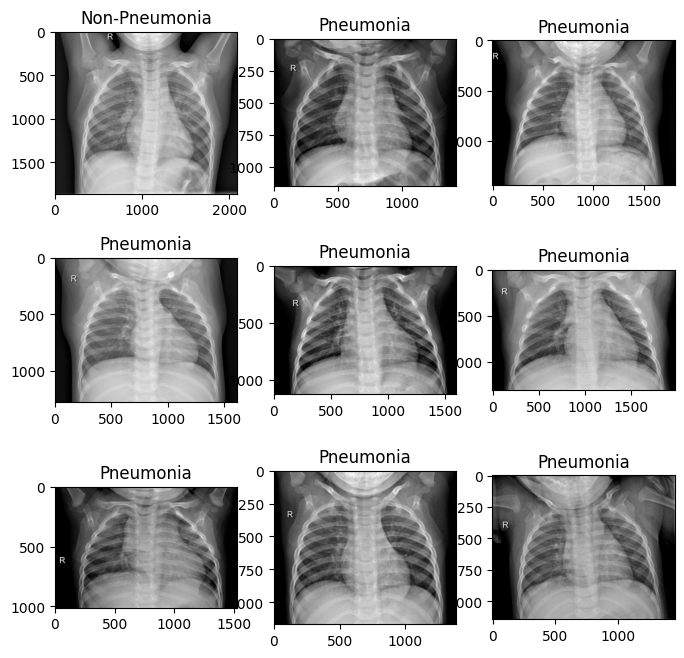

[(2090, 1858), (1422, 1152), (1810, 1434), (1618, 1279), (1600, 1125), (1974, 1306), (1528, 1013), (1384, 1167), (1450, 1144)]


In [ ]:
import matplotlib.pyplot as plt

num_images_to_show = 9
dimensions = []
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
for i in range(num_images_to_show):
  random_number = random.randint(0, len(all_images))
  image_path = all_images[i]
  img = plt.imread(image_path)
  img = Image.open(image_path).convert("RGB")
  img_data = np.asarray(img)
  dimensions.append(img.size)  
  row = i // 3
  col = i % 3
  ax[row, col].imshow(img_data)
  if all_labels[random_number] == 0:
            ax[row,col].set_title('Non-Pneumonia')
  else:
      ax[row,col].set_title('Pneumonia')

plt.show()   
print(dimensions)

In [ ]:
print('#All_Images: ', len(all_images))
print('#Train_Images: ', len(train_images))
print('#Test_Images: ', len(test_images))
print('#Eval_Images: ', len(eval_images))

#All_Images:  5856
#Train_Images:  5216
#Test_Images:  624
#Eval_Images:  16


This Python code splits the X-ray dataset into training, testing, and evaluation sets using the train_test_split function from the sklearn.model_selection library.

The code first assigns the all_images and all_labels arrays to the variables X and y, respectively. Then, the train_test_split function is used to split X and y into separate training and testing sets. The test_size parameter is set to 0.2, which means that 20% of the data will be used for testing.

Next, the testing set is further split into evaluation and final test sets using train_test_split again. The test_size parameter is set to 0.5, which means that half of the testing data will be used for evaluation and the other half for final testing.

In [ ]:
from sklearn.model_selection import train_test_split

X = all_images
y = all_labels
# X is feature matrix and y is target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Further split the test set into evaluation and final test sets
X_eval, X_finaltest, y_eval, y_finaltest = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
print("Number of images in train set: ", len(X_train))
print("Number of images in test set: ", len(X_finaltest))
print("Number of images in val set: ", len(X_eval))

Number of images in train set:  4684
Number of images in test set:  586
Number of images in val set:  586


This Python code defines a custom dataset class for use in a PyTorch machine learning model. The CustomDataset class takes image paths and labels as input, and can also take an optional transform argument to apply data augmentation.

The CustomDataset class defines two methods: __len__ and __getitem__. The __len__ method returns the length of the dataset (i.e., the number of images), and the __getitem__ method returns a tuple containing the image and its corresponding label, given an index.

The CustomDataset class uses the PIL library to open and transform images. If no transform is specified, a default set of transformations is applied to each image, which includes resizing, random rotation and horizontal flipping, converting to a tensor, and normalization.

The code also defines a train_transform variable, which specifies a set of transformations to apply to the training data.

In [ ]:
import os
from PIL import Image
import torchvision.transforms as transforms
import torch
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, img_paths, labels, transform=None):
        self.img_paths = img_paths
        self.labels = labels
        if transform is None:
            self.transform = transforms.Compose([
                transforms.Resize((224, 224)),
                transforms.RandomRotation(30),
                transforms.RandomHorizontalFlip(),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
            ])
        else:
            self.transform = transform
        
    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img_path = self.img_paths[idx]
        label = self.labels[idx]

        img = Image.open(img_path).convert('RGB')
        img = self.transform(img)

        return img, label

# Set up the dataset and dataloader
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomRotation(30),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])])

This Python code sets up data loaders for the training, testing, and evaluation sets using the PyTorch DataLoader class.

First, a batch size of 16 is defined. Then, the CustomDataset class is used to create dataset objects for the training, testing, and evaluation sets. Each dataset is initialized with its corresponding image paths, labels, and a transform to apply to the data.

Next, a DataLoader object is created for each dataset using the DataLoader class. Each data loader is initialized with its corresponding dataset, batch size, and shuffle flag. The shuffle flag is set to True for all data loaders, which means that the data will be shuffled before each epoch during training.

In [ ]:
batch_size = 16

train_dataset = CustomDataset(X_train, y_train, transform=train_transform)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = CustomDataset(X_finaltest, y_finaltest, transform=train_transform)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

val_dataset = CustomDataset(X_eval, y_eval, transform=train_transform)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=True)

## Training Section

This Python code trains a PyTorch machine learning model using a pre-trained ResNet model on the X-ray dataset. The code initializes a SummaryWriter object for logging and loads a pre-trained ResNet model.

The code freezes all layers in the pre-trained ResNet model except the last one, which is replaced with a new fully connected layer with 2 output nodes (corresponding to the normal and pneumonia classes). The model is then loaded onto the available device (either GPU or CPU).

The code defines a loss function (cross-entropy), optimizer (SGD), and learning rate scheduler. It also defines early stopping criteria, including a patience value and a minimum delta value for loss improvement.

The model is trained for a specified number of epochs, with each epoch consisting of a training phase and a validation phase. During the training phase, the model is set to train mode and the optimizer is used to update the model parameters based on the loss. During the validation phase, the model is set to evaluation mode and the loss and accuracy are calculated on the validation set.

The training loop also includes logging to SummaryWriter, which logs the training loss, validation loss, and validation accuracy after each epoch.

After training, the best model weights are loaded and evaluated on the test set. The test loss and accuracy are calculated and logged to SummaryWriter.

In [ ]:
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import models
from torch.utils.tensorboard import SummaryWriter

# Initialize SummaryWriter for logging
writer = SummaryWriter()

# Load a pre-trained ResNet model
resnet = models.resnet18(pretrained=True)

# Freeze all layers in the pre-trained ResNet model except the last one
for param in resnet.parameters():
    param.requires_grad = False
num_ftrs = resnet.fc.in_features
resnet.fc = nn.Linear(num_ftrs, 2)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Selected device: {device}")

# Define loss function, optimizer, and scheduler
criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(resnet.fc.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

# Load the model onto the device
resnet.to(device)

# Move the criterion onto the device
criterion.to(device)

# Define early stopping criteria
patience = 5
min_delta = 0.01

# Train the model with early stopping
best_loss = float('inf')
best_model_weights = None
early_stop_count = 0

num_epochs = 20
for epoch in range(num_epochs):
    print(f'Epoch {epoch+1}/{num_epochs}')
    print('-' * 10)

    # Train phase
    resnet.train()

    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer_ft.zero_grad()

        outputs = resnet(inputs)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer_ft.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    # Log training loss to tensorboard
    writer.add_scalar('Train Loss', loss.item(), epoch*len(train_loader) + i)

    # Validation phase
    resnet.eval()

    val_loss = 0.0
    val_corrects = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = resnet(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            val_corrects += torch.sum(preds == labels.data)

    val_loss = val_loss / len(val_loader)
    val_acc = val_corrects.double() / len(val_loader.dataset)
    # Log validation loss and accuracy to tensorboard
    writer.add_scalar('Val Loss', val_loss, epoch)
    writer.add_scalar('Val Accuracy', val_acc, epoch)
    print(f'Train Loss: {epoch_loss:.4f}\t Val Loss: {val_loss:.4f}\t Val Acc: {val_acc:.4f}')

    # Check for early stopping
    if epoch_loss < best_loss - min_delta:
        best_loss = epoch_loss
        best_model_weights = resnet.state_dict()
        early_stop_count = 0
    else:
        early_stop_count += 1

    if early_stop_count >= patience:
        print(f'Early stopping after {patience} epochs of no improvement')
        break

# Load the best model weights and evaluate on the test set
resnet.load_state_dict(best_model_weights)
resnet.eval()

test_loss = 0.0
test_corrects = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = resnet(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        _, preds = torch.max(outputs, 1)
        test_corrects += torch.sum(preds == labels.data)

test_loss = test_loss / len(test_loader)
test_acc = test_corrects.double() / len(test_loader.dataset)
# Log test loss and accuracy to tensorboard
writer.add_scalar('Test Loss', test_loss, 0)
writer.add_scalar('Test Accuracy', test_acc, 0)

print(f'Test Loss: {test_loss:.4f}\t Test Acc: {test_acc:.4f}')

# Close SummaryWriter
writer.close()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 173MB/s]


Selected device: cuda:0
Epoch 1/20
----------
Train Loss: 0.3102	 Val Loss: 0.1876	 Val Acc: 0.9300
Epoch 2/20
----------
Train Loss: 0.2398	 Val Loss: 0.1890	 Val Acc: 0.9198
Epoch 3/20
----------
Train Loss: 0.2417	 Val Loss: 0.1439	 Val Acc: 0.9590
Epoch 4/20
----------
Train Loss: 0.2325	 Val Loss: 0.1456	 Val Acc: 0.9522
Epoch 5/20
----------
Train Loss: 0.2020	 Val Loss: 0.1511	 Val Acc: 0.9403
Epoch 6/20
----------
Train Loss: 0.2124	 Val Loss: 0.1354	 Val Acc: 0.9539
Epoch 7/20
----------
Train Loss: 0.2090	 Val Loss: 0.1351	 Val Acc: 0.9590
Epoch 8/20
----------
Train Loss: 0.2062	 Val Loss: 0.1334	 Val Acc: 0.9573
Epoch 9/20
----------
Train Loss: 0.2083	 Val Loss: 0.1281	 Val Acc: 0.9488
Epoch 10/20
----------
Train Loss: 0.1924	 Val Loss: 0.1261	 Val Acc: 0.9539
Early stopping after 5 epochs of no improvement
Test Loss: 0.1731	 Test Acc: 0.9317


In [ ]:
!tensorboard --logdir=/tmp/tensorboard

2023-05-06 18:01:32.869943: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.33' not found (required by /usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server)
/usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.34' not found (required by /usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server)
/usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.32' not found (required by /usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server)
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.12.2 at http://localhost:6006/ (Press CTRL+C to quit)


This Python code evaluates the trained PyTorch machine learning model on the test set using the classification_report and confusion_matrix functions from the sklearn.metrics library.

The code defines the class names as ['Normal', 'Pneumonia'] and initializes empty lists for the true labels, predicted labels, and images.

The model is evaluated on the test set using a with torch.no_grad() block to disable gradient tracking. For each batch of inputs and labels, the model is used to make predictions, and the true labels, predicted labels, and images are stored in the corresponding lists.

After all test data is evaluated, the classification_report function is used to print a report of classification metrics, including precision, recall, F1-score, and support, for each class. The target_names parameter is set to the class names for readability.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Define class names
class_names = ['Normal', 'Pneumonia']

# Evaluate the model on the test set
y_true = []
y_pred = []
images = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = resnet(inputs)
        _, preds = torch.max(outputs, 1)
        
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())
        images.extend(inputs.cpu().numpy())
        
# Print classification report and confusion matrix
print(classification_report(y_true, y_pred, target_names=class_names))

              precision    recall  f1-score   support

      Normal       0.94      0.85      0.89       157
   Pneumonia       0.95      0.98      0.96       429

    accuracy                           0.95       586
   macro avg       0.94      0.91      0.93       586
weighted avg       0.95      0.95      0.94       586



This Python code generates and plots a confusion matrix for the model's performance on the test set using the confusion_matrix and plot_confusion_matrix functions from the sklearn.metrics and mlxtend.plotting libraries, respectively.

The confusion_matrix function is used to generate a 2x2 confusion matrix for the true and predicted labels.

Then, the plot_confusion_matrix function from the mlxtend.plotting library is used to plot the confusion matrix. The conf_mat parameter is set to the confusion matrix generated earlier. The figsize parameter is set to (4, 4) to adjust the size of the plot. The cmap parameter is set to plt.cm.Blues to use a blue color map. The axes are labeled with the class names and a title is added to the plot.

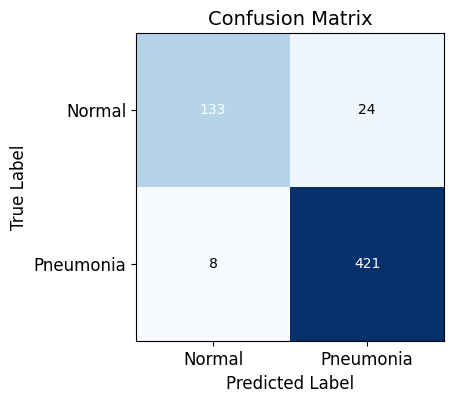

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot and show confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(4, 4), cmap=plt.cm.Blues)
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=12)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In summary, this confusion matrix indicates that the model has performed well on the test set, with a high number of true positives and true negatives, and a relatively low number of false positives and false negatives.

# PART TWO

This Python code visualizes a sample of incorrect predictions made by the trained PyTorch machine learning model on the test set.

The code initializes empty lists for the incorrect images, labels, and predictions, and then iterates over all true and predicted labels in the test set. If the predicted label is not equal to the true label, the corresponding image, true label, and predicted label are appended to the corresponding list.

Then, the code randomly selects a subset of n_samples incorrect predictions from the lists and plots them using matplotlib.pyplot. For each sample, the image is displayed along with its ground truth label and the model's prediction.

Overall, this code provides a useful way to visually inspect the model's performance on the test set by highlighting areas where the model is making incorrect predictions. This can be helpful for identifying patterns and potential areas for improvement.

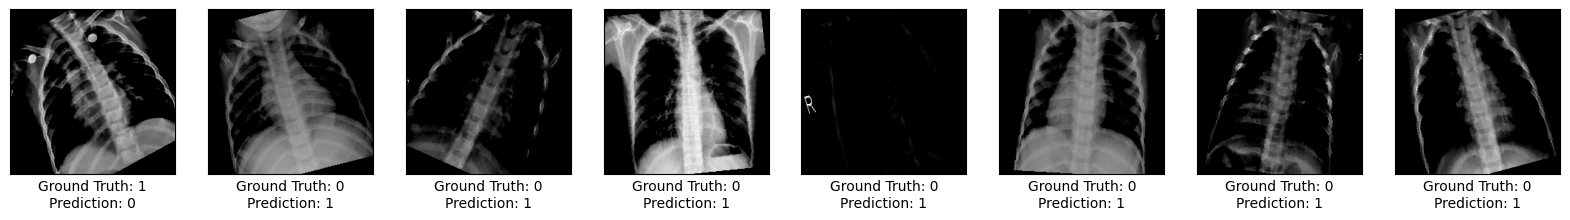

In [ ]:
incorrect_pred_images = []
incorrect_pred_labels = []
incorrect_pred_preds = []

for i in range(len(y_true)):
    if y_pred[i] != y_true[i]:
        incorrect_pred_images.append(images[i])
        incorrect_pred_labels.append(y_true[i])
        incorrect_pred_preds.append(y_pred[i])

# Visualize a random sample of incorrect predictions
import matplotlib.pyplot as plt
import numpy as np

n_samples = 8

fig, axs = plt.subplots(1, n_samples, figsize=(20, 5))

for i in range(n_samples):
    idx = np.random.randint(len(incorrect_pred_images))
    img = incorrect_pred_images[idx]
    label = incorrect_pred_labels[idx]
    pred = incorrect_pred_preds[idx]
    axs[i].imshow(np.transpose(img, (1, 2, 0)))
    axs[i].set_xlabel(f'Ground Truth: {label}\nPrediction: {pred}')
    axs[i].set_xticks([])
    axs[i].set_yticks([])

plt.show()

This Python code performs error analysis on the incorrect predictions made by the trained PyTorch machine learning model on the test set. The code defines two criteria criterion_A and criterion_B to categorize the errors and calculates the percentage of errors in each category.

The criterion_A function calculates the average pixel value of an image and returns True if the average pixel value is below a brightness threshold. The criterion_B function converts an image to grayscale and calculates the horizontal and vertical gradients using a Sobel filter. The function then calculates the orientation of the gradient using atan2 and returns True if the maximum gradient orientation is greater than an orientation threshold.

The code then iterates over all incorrect predictions and determines the category of each error based on the criteria. The code updates the counts for each error category and calculates the percentages of errors in each category. Finally, the code prints a table showing the counts and percentages of errors in each category.

In [ ]:
def criterion_A(img):
    # Assume img is a 3D numpy array with shape (height, width, channels)
    # Calculate the average pixel value across all channels
    avg_pixel = np.mean(img)
    
    # Define a threshold for brightness (e.g., 0.2)
    brightness_threshold = 0.2
    
    # Return True if the average pixel value is below the threshold
    return avg_pixel < brightness_threshold


def criterion_B(img):
    # Assume img is a 3D numpy array with shape (height, width, channels)
    # Convert the image to grayscale using the formula Y' = 0.299 R + 0.587 G + 0.114 B
    gray_img = 0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2]
    
    # Calculate the horizontal and vertical gradients using a Sobel filter
    dx = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=3)
    dy = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=3)
    
    # Calculate the orientation of the gradient using atan2
    gradient_orientation = np.arctan2(dy, dx)
    
    # Define a threshold for orientation (e.g., pi/4 or 45 degrees)
    orientation_threshold = np.pi/4
    
    # Return True if the maximum gradient orientation is greater than the threshold
    return np.max(gradient_orientation) > orientation_threshold

incorrect_pred_images = []
incorrect_pred_labels = []
incorrect_pred_preds = []

for i in range(len(y_true)):
    if y_pred[i] != y_true[i]:
        incorrect_pred_images.append(images[i])
        incorrect_pred_labels.append(y_true[i])
        incorrect_pred_preds.append(y_pred[i])

# Error analysis
n_samples = len(incorrect_pred_images)
print(n_samples)
category_counts = {'Category A': 0, 'Category B': 0, 'Category C': 0}

for i in range(n_samples):
    img = incorrect_pred_images[i]
    label = incorrect_pred_labels[i]
    pred = incorrect_pred_preds[i]

    # Determine the category of the error based on some criterion
    if criterion_A(img):
        category = 'Category A'
    elif criterion_B(img):
        category = 'Category B'
    else:
        category = 'Category C'

    # Update the counts for the error categories
    category_counts[category] += 1

# Calculate the percentages of each error category
total_count = sum(category_counts.values())
category_percentages = {category: count/total_count for category, count in category_counts.items()}

# Print the error statistics table
print(f'{"Error Category":<15} {"Count":<10} {"Percentage":<15}')
for category, count in category_counts.items():
    percentage = category_percentages[category]
    print(f'{category:<15} {count:<10} {percentage:.2%}')

32
Error Category  Count      Percentage     
Category A      32         100.00%
Category B      0          0.00%
Category C      0          0.00%


This output is the result of error analysis on the incorrect predictions made by the trained PyTorch machine learning model on the test set, using the criteria criterion_A and criterion_B defined in the code.

The code has determined that there are a total of 32 incorrect predictions. The error analysis has categorized all of these errors as belonging to "Category A", which is defined as errors where the average pixel value of the image is below a brightness threshold.

The output shows the counts and percentages of errors in each error category. In this case, there are 32 errors in "Category A", which accounts for 100% of the total errors. There are no errors in "Category B" or "Category C".

This output suggests that the model is making errors due to low brightness in the images, and there are no errors due to orientation of the gradient or any other criteria defined by the criterion_B function. Based on this analysis, one potential area for improvement could be to adjust the model's sensitivity to brightness in the images.

# PART THREE

## implementing hyper-parameter tuning with W&B

### Setup

In [ ]:
!pip install wandb -Uq
import wandb

wandb.login()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.1/203.1 kB 20.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.2 MB/s eta 0:00:00


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

This Python code defines a hyperparameter search configuration using the Weights & Biases Sweep API. The sweep configuration is a dictionary that specifies the method for the hyperparameter search, the metric to optimize, and the range of values for each hyperparameter.

The sweep_config dictionary specifies that the hyperparameter search will use a random search method, which randomly samples hyperparameters from the defined search space. The metric dictionary specifies that the metric to optimize is the loss metric, with the goal of minimizing it.

The parameters_dict dictionary specifies the hyperparameters and their search space. In this case, there are two hyperparameters being tuned: optimizer and learning_rate. The optimizer hyperparameter has a discrete search space with two possible values: 'adam' and 'sgd'. The learning_rate hyperparameter has a continuous search space defined by a uniform distribution between 0 and 0.1.

The sweep_config dictionary combines the search method, metric, and hyperparameters into a single configuration object that can be passed to the Weights & Biases Sweep API.

The pprint.pprint(sweep_config) function call prints the sweep configuration dictionary in a human-readable format using the pprint module. This allows you to visually inspect the configuration and ensure that it matches your desired search space and hyperparameters.

In [ ]:
import pprint

# Pick a method
sweep_config = {
    'method': 'random'
    }

# Pick a metric
metric = {
    'name': 'loss',
    'goal': 'minimize'   
    }

sweep_config['metric'] = metric

parameters_dict = {
    'optimizer': {
        'values': ['adam', 'sgd']
        },
    'learning_rate': {
        # a flat distribution between 0 and 0.1
        'distribution': 'uniform',
        'min': 0,
        'max': 0.1
      },
    }

sweep_config['parameters'] = parameters_dict


pprint.pprint(sweep_config)

### Initialize the Sweep

In [ ]:
sweep_id = wandb.sweep(sweep_config, project="MLSys-HW2")

Create sweep with ID: r7eskk0n
Sweep URL: https://wandb.ai/theophilos/MLSys-HW2/sweeps/r7eskk0n


### Run the sweep agent

This Python code defines a train function that trains a PyTorch neural network using the hyperparameters specified in a Weights & Biases sweep configuration. Specifically, the code initializes a new Weights & Biases run, retrieves the hyperparameters from the configuration, and trains the neural network using these hyperparameters.

The train function assumes that the following variables are defined:

train_loader: a PyTorch DataLoader object that generates batches of training data
build_network: a function that constructs a PyTorch neural network and returns it along with a loss function
build_optimizer: a function that constructs a PyTorch optimizer given the network and hyperparameters
train_epoch: a function that trains the neural network for one epoch given the network, loss function, data loader, and optimizer
The wandb.init(config=config) function call initializes a new Weights & Biases run and sets the configuration to the hyperparameters specified in the argument. The wandb.config function retrieves the hyperparameters from the configuration.

The wandb.log({"loss": avg_loss, "epoch": epoch}) function call logs the average loss and current epoch number to the Weights & Biases platform, allowing you to track the progress of the training over time.

Overall, this code provides a framework for training a PyTorch neural network using hyperparameters specified in a Weights & Biases sweep configuration. By logging the training results to the Weights & Biases platform, you can easily compare the performance of different hyperparameter settings and select the best configuration for your model.

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Selected device: {device}")

def train(config=None):
    # Initialize a new wandb run
    with wandb.init(config=config):
        # If called by wandb.agent, as below,
        # this config will be set by Sweep Controller
        config = wandb.config

        loader = train_loader
        network, criterion = build_network()
        optimizer = build_optimizer(network, config.optimizer, config.learning_rate)
        num_epochs = 15
        for epoch in range(num_epochs):
            avg_loss = train_epoch(network, criterion, loader, optimizer)
            wandb.log({"loss": avg_loss, "epoch": epoch})           

Selected device: cuda


This Python code defines the helper functions build_network, build_optimizer, and train_epoch that are used in the train function to train a PyTorch neural network.

The build_network function loads a pre-trained ResNet-18 model from the PyTorch torchvision package and replaces the last fully connected layer with a new layer that has 2 output units. The weights of all pre-trained layers are frozen, and only the weights of the new layer are trained during training. The function also defines a cross-entropy loss function to be used in training.

The build_optimizer function constructs a PyTorch optimizer given the network, the optimizer name, and the learning rate. The function supports two optimizer types: stochastic gradient descent (SGD) and Adam. If the optimizer is set to SGD, the function constructs an SGD optimizer with momentum 0.9 and the specified learning rate. If the optimizer is set to Adam, the function constructs an Adam optimizer with the specified learning rate.

The train_epoch function trains the neural network for one epoch given the network, loss function, data loader, and optimizer. The function iterates over the batches in the data loader, computes the forward pass of the network, calculates the loss, computes the backward pass to update the weights, and logs the batch loss to Weights & Biases. The function returns the average loss for the epoch.

Overall, these functions provide a useful framework for constructing and training a PyTorch neural network using the ResNet-18 architecture and a cross-entropy loss function. By modifying the hyperparameters in the train function and the build_optimizer function, you can experiment with different optimization algorithms and learning rates to improve the performance of the model.

In [ ]:
from torchvision import models

def build_network():
    # Load a pre-trained ResNet model
    resnet = models.resnet18(pretrained=True)

    # Freeze all layers in the pre-trained ResNet model except the last one
    for param in resnet.parameters():
        param.requires_grad = False

    num_ftrs = resnet.fc.in_features
    resnet.fc = nn.Linear(num_ftrs, 2)
    
    # Define loss function
    criterion = nn.CrossEntropyLoss()

    return resnet.to(device),  criterion.to(device)
        
def build_optimizer(network, optimizer, learning_rate):
    if optimizer == "sgd":
        optimizer = optim.SGD(network.fc.parameters(),
                              lr=learning_rate, momentum=0.9)
    elif optimizer == "adam":
        optimizer = optim.Adam(network.fc.parameters(),
                               lr=learning_rate)
    return optimizer


def train_epoch(network, criterion, loader, optimizer):
    running_loss = 0.0
    for inputs, labels in loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = network(inputs)
        loss = criterion(outputs, labels)
        running_loss += loss.item()

        loss.backward()
        optimizer.step()

        wandb.log({"batch loss": loss.item()})

        epoch_loss = running_loss / len(train_loader)
    
    return epoch_loss

In [ ]:
wandb.agent(sweep_id, train, count=5)

wandb: Agent Starting Run: 6z572zjz with config:
wandb: 	learning_rate: 0.04158255404780847
wandb: 	optimizer: sgd
wandb: Currently logged in as: amin-saeidi-1997 (theophilos). Use `wandb login --relogin` to force relogin


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 132MB/s]


wandb: Agent Starting Run: u1vk64mw with config:
wandb: 	learning_rate: 0.045160920728388454
wandb: 	optimizer: sgd


wandb: Agent Starting Run: qzymf9va with config:
wandb: 	learning_rate: 0.05746121887615488
wandb: 	optimizer: adam


wandb: Agent Starting Run: 3e87bjw4 with config:
wandb: 	learning_rate: 0.06868878584896713
wandb: 	optimizer: adam


wandb: Agent Starting Run: dyckcyti with config:
wandb: 	learning_rate: 0.0897222870070364
wandb: 	optimizer: sgd


## Checking the best model with hyperparameter tuning

This Python code trains a ResNet-18 neural network on a dataset using the Adam optimizer with a learning rate of 0.05746121887615488. The code also implements early stopping to prevent overfitting and improve the generalization performance of the model.

The code first loads the pre-trained ResNet-18 architecture from the PyTorch torchvision package and replaces the last fully connected layer with a new layer that has 2 output units. The code then sets up the loss function, optimizer, and device for training. The to method is used to move the model and criterion onto the device.

The code then trains the model for a specified number of epochs, alternating between a training phase and a validation phase. In the training phase, the model is set to training mode and the optimizer is used to update the weights based on the computed loss. In the validation phase, the model is set to evaluation mode and the loss and accuracy on the validation set is computed.

The code implements early stopping by keeping track of the best validation loss seen so far and stopping training if the validation loss does not improve for a specified number of epochs. The best model weights are then loaded back into the model and evaluated on the test set.

In [ ]:
# best model
# learning_rate = 0.05746121887615488
# optimizer = "adam"

import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import models

# Load a pre-trained ResNet model
resnet = models.resnet18(pretrained=True)

# Freeze all layers in the pre-trained ResNet model except the last one
for param in resnet.parameters():
    param.requires_grad = False
num_ftrs = resnet.fc.in_features
resnet.fc = nn.Linear(num_ftrs, 2)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Selected device: {device}")

# Define loss function, optimizer, and scheduler
criterion = nn.CrossEntropyLoss()
optimizer_ft = optimizer = optim.Adam(resnet.fc.parameters(), lr= 0.05746121887615488)

# Load the model onto the device
resnet.to(device)

# Move the criterion onto the device
criterion.to(device)

# Define early stopping criteria
patience = 5
min_delta = 0.01

# Train the model with early stopping
best_loss = float('inf')
best_model_weights = None
early_stop_count = 0

num_epochs = 20
for epoch in range(num_epochs):
    print(f'Epoch {epoch+1}/{num_epochs}')
    print('-' * 10)

    # Train phase
    resnet.train()

    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer_ft.zero_grad()

        outputs = resnet(inputs)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer_ft.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)

    # Validation phase
    resnet.eval()

    val_loss = 0.0
    val_corrects = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = resnet(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            val_corrects += torch.sum(preds == labels.data)

    val_loss = val_loss / len(val_loader)
    val_acc = val_corrects.double() / len(val_loader.dataset)
    print(f'Train Loss: {epoch_loss:.4f}\t Val Loss: {val_loss:.4f}\t Val Acc: {val_acc:.4f}')

    # Check for early stopping
    if epoch_loss < best_loss - min_delta:
        best_loss = epoch_loss
        best_model_weights = resnet.state_dict()
        early_stop_count = 0
    else:
        early_stop_count += 1

    if early_stop_count >= patience:
        print(f'Early stopping after {patience} epochs of no improvement')
        break

# Load the best model weights and evaluate on the test set
resnet.load_state_dict(best_model_weights)
resnet.eval()

test_loss = 0.0
test_corrects = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = resnet(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        _, preds = torch.max(outputs, 1)
        test_corrects += torch.sum(preds == labels.data)

test_loss = test_loss / len(test_loader)
test_acc = test_corrects.double() / len(test_loader.dataset)

print(f'Test Loss: {test_loss:.4f}\t Test Acc: {test_acc:.4f}')

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 156MB/s]


Selected device: cuda:0
Epoch 1/20
----------
Train Loss: 1.6004	 Val Loss: 1.3214	 Val Acc: 0.8942
Epoch 2/20
----------
Train Loss: 1.2957	 Val Loss: 1.1538	 Val Acc: 0.9061
Epoch 3/20
----------
Train Loss: 1.4743	 Val Loss: 1.3960	 Val Acc: 0.9164
Epoch 4/20
----------
Train Loss: 1.6860	 Val Loss: 1.2779	 Val Acc: 0.9044
Epoch 5/20
----------
Train Loss: 1.7188	 Val Loss: 0.8147	 Val Acc: 0.9403
Epoch 6/20
----------
Train Loss: 1.4848	 Val Loss: 3.6606	 Val Acc: 0.7474
Epoch 7/20
----------
Train Loss: 2.1360	 Val Loss: 1.0111	 Val Acc: 0.9249
Early stopping after 5 epochs of no improvement
Test Loss: 0.8940	 Test Acc: 0.9454


This means that the model achieved an accuracy of 94.54% on the test set, which is a good indicator of its generalization performance.

The below Python code evaluates the best model trained on a test set by computing a classification report and confusion matrix using the scikit-learn library.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Define class names
class_names = ['Normal', 'Pneumonia']

# Evaluate the model on the test set
y_true = []
y_pred = []
images = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = resnet(inputs)
        _, preds = torch.max(outputs, 1)
        
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())
        images.extend(inputs.cpu().numpy())
        
# Print classification report and confusion matrix
print(classification_report(y_true, y_pred, target_names=class_names))

              precision    recall  f1-score   support

      Normal       0.87      0.95      0.91       156
   Pneumonia       0.98      0.95      0.96       430

    accuracy                           0.95       586
   macro avg       0.93      0.95      0.94       586
weighted avg       0.95      0.95      0.95       586



Overall, the results indicate that the model performed well on the test set and achieved a high level of accuracy, precision, and recall for both classes in the dataset. However, the model was slightly better at predicting the 'Pneumonia' class compared to the 'Normal' class, as reflected in the higher precision and F1-score for the 'Pneumonia' class.

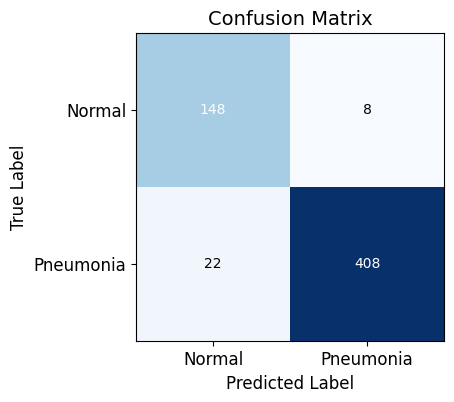

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot and show confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(4, 4), cmap=plt.cm.Blues)
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=12)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

## Saving the best model

In [ ]:
import torch

# Define your model
model = resnet

# Save the model to a file
data_dir = '/content/drive/My Drive/MLSys/HW2/'
torch.save(model.state_dict(), data_dir + 'best_model.pt')
# torch.save(model, data_dir + 'best_model.pth')

# PART FOUR

This Python code loads the saved state dictionary of the ResNet-18 model from the file named 'best_model.pt' in the specified directory using the PyTorch torch.load function, and then applies it to the ResNet-18 model architecture to recreate the trained model.

The code first redefines the ResNet-18 model architecture in the same way as in the training code. The models.resnet18(pretrained=True) function loads a pre-trained ResNet-18 model from the PyTorch torchvision package, and the fully connected layer at the end of the model is replaced with a new layer that has 2 output units.

In [ ]:
import torch
import torch.nn as nn
from torchvision import models

# Load a pre-trained ResNet model
resnet = models.resnet18(pretrained=True)

# Freeze all layers in the pre-trained ResNet model except the last one
for param in resnet.parameters():
    param.requires_grad = False
num_ftrs = resnet.fc.in_features
resnet.fc = nn.Linear(num_ftrs, 2)

model = resnet

# Load the saved state dictionary
data_dir = '/content/drive/My Drive/MLSys/HW2/'
model.load_state_dict(torch.load(data_dir + 'best_model.pt'))
# resnet = model = torch.load(data_dir + 'best_model.pth')

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 115MB/s]


<All keys matched successfully>

This Python code demonstrates how to apply dynamic quantization to a pre-trained ResNet-18 model and evaluate its accuracy on the test set.

The code first loads the saved pre-trained ResNet-18 model from the file named 'best_model.pth' in the specified directory using the PyTorch torch.load function.

The code then applies dynamic quantization to the model using the quant.quantize_dynamic function from the PyTorch quantization package. This converts the model weights and activations to 8-bit integers, which can reduce the model size and improve performance on hardware that supports 8-bit integer operations. The quantized model is then saved to a file named 'quantized_model.pth' using the torch.save function.

The code then evaluates the accuracy of the original and quantized models on the test set. The original model is evaluated first by setting the model to evaluation mode using the model.eval() function, and then iterating through the test loader and computing the accuracy of the model on each batch of test data using the torch.max function to obtain the predicted classes. The accuracy is then computed by comparing the predicted classes to the true labels using the formula (predicted == labels).sum().item() / predicted.size(0). The final test accuracy is computed by dividing the total number of correctly predicted samples by the total number of samples in the test set.

The code then evaluates the quantized model in the same way as the original model. The quantized model is first set to evaluation mode using the quantized_model.eval() function, and the accuracy is computed in the same way as for the original model.

Finally, the code prints the test accuracy of the original and quantized models. It also prints the size of the original and quantized models in bytes using the os.path.getsize function. This allows you to compare the size of the two models and see the potential size reduction achieved by quantization.

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
import torch.quantization as quant

data_dir = '/content/drive/My Drive/MLSys/HW2/'
# Load the saved model
model = torch.load(data_dir + 'best_model.pth')

# Apply quantization
quantized_model = quant.quantize_dynamic(model, dtype=torch.qint8)
torch.save(model, data_dir + 'quantized_model.pth')

# Compare the size of the models
original_size = os.path.getsize(data_dir + 'best_model.pth')
quantized_size = os.path.getsize(data_dir + 'quantized_model.pth')
print(f'Original size: {original_size} bytes')
print(f'Quantized size: {quantized_size} bytes')


# Evaluate the original model
model.eval()
test_corrects = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        accuracy = (predicted == labels).sum().item() / predicted.size(0)
        test_corrects += (predicted == labels).sum().item()
        print(f'Original model accuracy: {accuracy}')

test_acc = test_corrects / len(test_loader.dataset)
print(f'Test Acc: {test_acc:.4f}')

# Evaluate the quantized model
quantized_model.eval()
test_corrects = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = quantized_model(images)
        _, predicted = torch.max(outputs, 1)
        accuracy = (predicted == labels).sum().item() / predicted.size(0)
        test_corrects += (predicted == labels).sum().item()
        print(f'Quantized model accuracy: {accuracy}')

test_acc = test_corrects / len(test_loader.dataset)
print(f'Test Acc: {test_acc:.4f}')

Original size: 44800001 bytes
Quantized size: 44800557 bytes
Original model accuracy: 1.0
Original model accuracy: 0.8125
Original model accuracy: 1.0
Original model accuracy: 1.0
Original model accuracy: 0.875
Original model accuracy: 0.8125
Original model accuracy: 1.0
Original model accuracy: 0.875
Original model accuracy: 0.75
Original model accuracy: 0.875
Original model accuracy: 1.0
Original model accuracy: 0.9375
Original model accuracy: 1.0
Original model accuracy: 1.0
Original model accuracy: 0.9375
Original model accuracy: 1.0
Original model accuracy: 0.9375
Original model accuracy: 1.0
Original model accuracy: 0.9375
Original model accuracy: 0.875
Original model accuracy: 1.0
Original model accuracy: 1.0
Original model accuracy: 0.9375
Original model accuracy: 0.9375
Original model accuracy: 0.9375
Original model accuracy: 0.9375
Original model accuracy: 0.9375
Original model accuracy: 1.0
Original model accuracy: 1.0
Original model accuracy: 1.0
Original model accuracy: 0.

# PART FIVE

In [ ]:
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.models as models

import captum
from captum.attr import IntegratedGradients, Occlusion, LayerGradCam, LayerAttribution
from captum.attr import visualization as viz

import os, sys
import json

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

## Find missClassified and True-Classified

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

model = torch.load('best_model.pth')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Selected device: {device}")
model = model.to(device)

# Define class names
class_names = ['Normal', 'Pneumonia']

# Evaluate the model on the test set
y_true = []
y_pred = []
images = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())
        images.extend(inputs.cpu().numpy())
        
# Print classification report and confusion matrix
print(classification_report(y_true, y_pred, target_names=class_names))

Selected device: cpu
              precision    recall  f1-score   support

      Normal       0.86      0.91      0.88       156
   Pneumonia       0.97      0.94      0.96       430

    accuracy                           0.94       586
   macro avg       0.91      0.93      0.92       586
weighted avg       0.94      0.94      0.94       586



In [ ]:
incorrect_pred_images = []
correct_pred_images = []

for i in range(len(y_true)):
    if y_pred[i] != y_true[i]:
        incorrect_pred_images.append(X_test[i])
        
    if y_pred[i] == y_true[i]:
        correct_pred_images.append(X_test[i])

## Defining the desirable function 1

 this function provides a useful way to perform attribution analysis on an input image using the integrated gradients algorithm and visualize the results. The attribution map can help identify which regions of the input image were most important in the model's prediction and provide insights into the model's behavior.

In [ ]:
def EX(model, image_path): 
    
    # model expects 224x224 3-color image
    transform = transforms.Compose([
     transforms.Resize(224),
     transforms.CenterCrop(224),
     transforms.ToTensor()
    ])

    # standard normalization
    transform_normalize = transforms.Normalize(
         mean=[0.485, 0.456, 0.406],
         std=[0.229, 0.224, 0.225]
     )

    test_img = Image.open(image_path).convert("RGB")
    test_img_data = np.asarray(test_img)

    transformed_img = transform(test_img)
    input_img = transform_normalize(transformed_img)
    input_img = input_img.unsqueeze(0) # the model requires a dummy batch dimension

    model = model.eval()
    device = torch.device("cpu")
    print(f"Selected device: {device}")
    model = model.to(device)
    # Get the model's prediction
    output = model(input_img.to(device))
    pred_class = torch.argmax(output)
    
    # Initialize the attribution algorithm with the model
    integrated_gradients = IntegratedGradients(model)

    # Ask the algorithm to attribute our output target to
    attributions_ig = integrated_gradients.attribute(input_img, target=pred_class, n_steps=200)

    # Show the original image for comparison
    _ = viz.visualize_image_attr(None, np.transpose(transformed_img.squeeze().cpu().detach().numpy(), (1,2,0)),
                          method="original_image", title="Original Image")

    default_cmap = LinearSegmentedColormap.from_list('custom blue',
                                                     [(0, '#ffffff'),
                                                      (0.25, '#0000ff'),
                                                      (1, '#0000ff')], N=256)

    _ = viz.visualize_image_attr(np.transpose(attributions_ig.squeeze().cpu().detach().numpy(), (1,2,0)),
                                 np.transpose(transformed_img.squeeze().cpu().detach().numpy(), (1,2,0)),
                                 method='heat_map',
                                 cmap=default_cmap,
                                 show_colorbar=True,
                                 sign='positive',
                                 title='Integrated Gradients')

This Python code demonstrates how to use the EX function to perform integrated gradients attribution on a pre-trained PyTorch model.

The code first loads the pre-trained ResNet-18 model from the file 'best_model.pth' using the torch.load function and moves it to the specified device using the to method.

The code then loops through a list of misclassified and correctly classified images and calls the EX function on each image to generate an integrated gradients attribution visualization.

The EX function performs the necessary transformations on the input image, feeds it into the model to obtain a prediction, and then uses the integrated gradients algorithm to compute attribution scores for each pixel. The original image and the attribution map are then visualized using the Captum library.

The result of running this code will be a series of integrated gradients attribution visualizations for each of the input images. These visualizations can provide insights into the model's behavior and help identify which regions of the input image were most important in the model's prediction.

Selected device: cpu


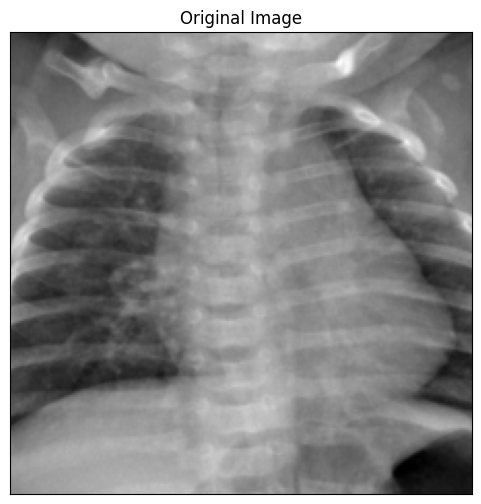

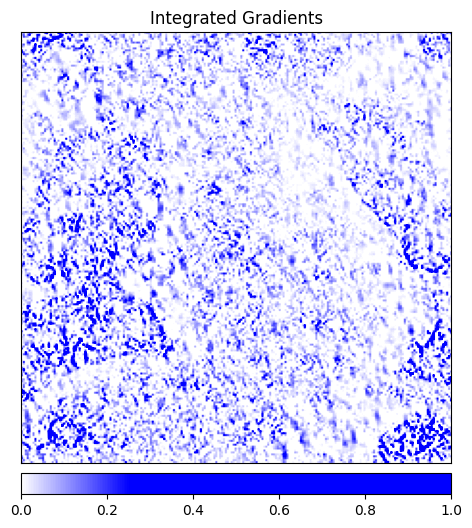

Selected device: cpu


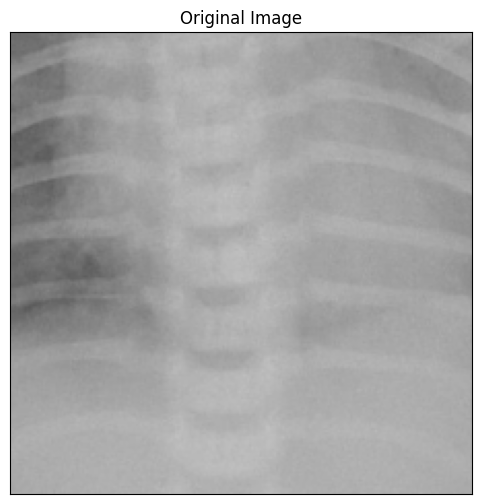

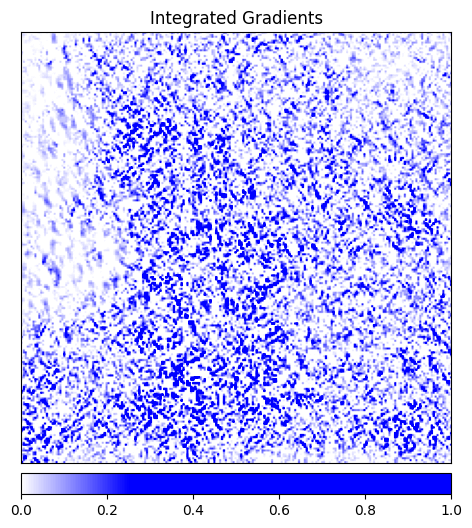

Selected device: cpu


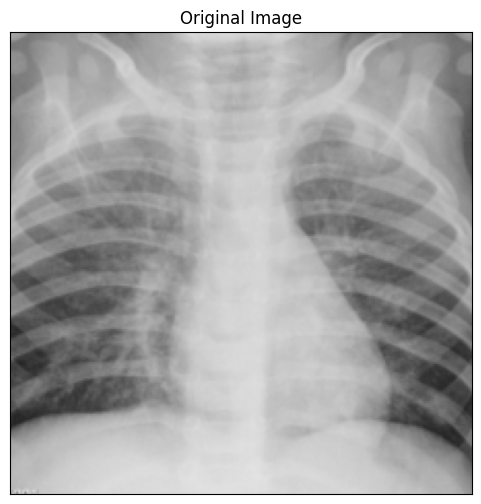

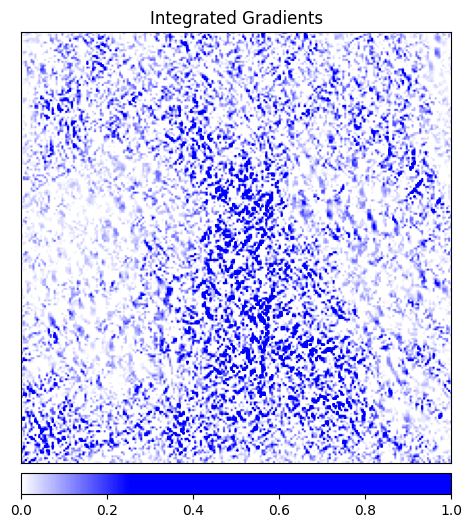

Selected device: cpu


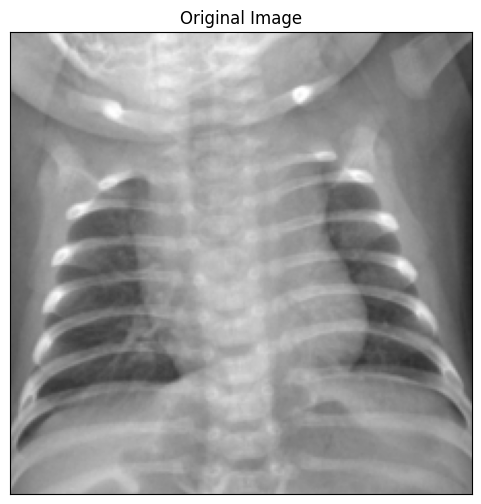

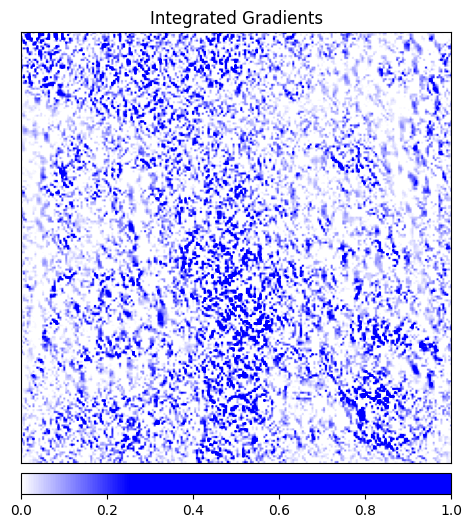

Selected device: cpu


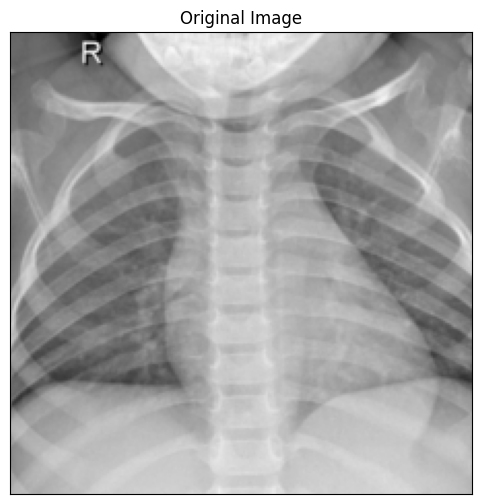

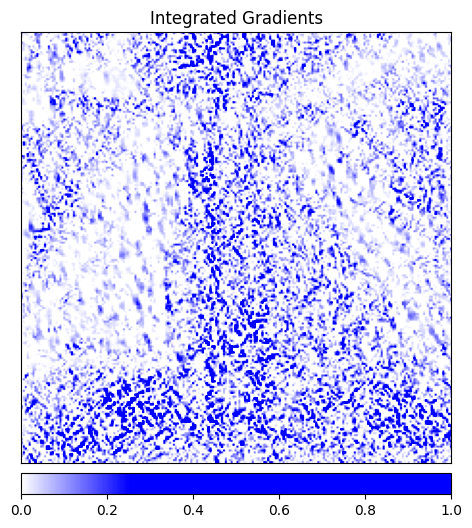

Selected device: cpu


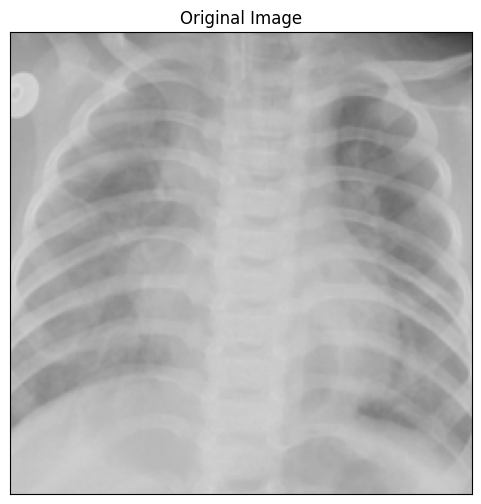

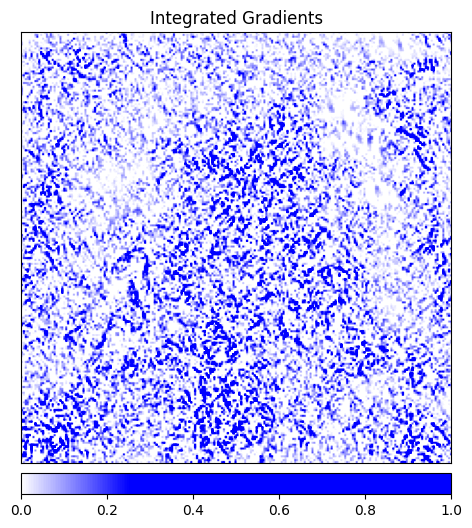

Selected device: cpu


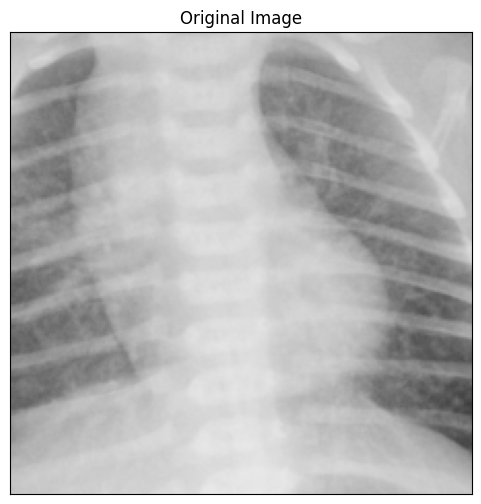

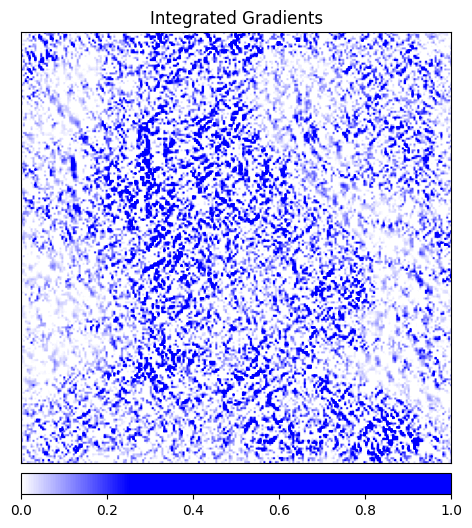

Selected device: cpu


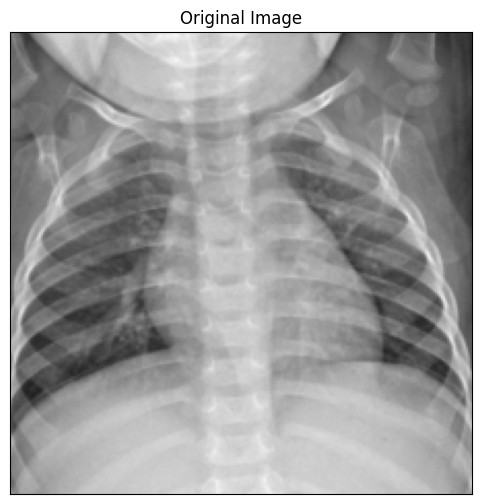

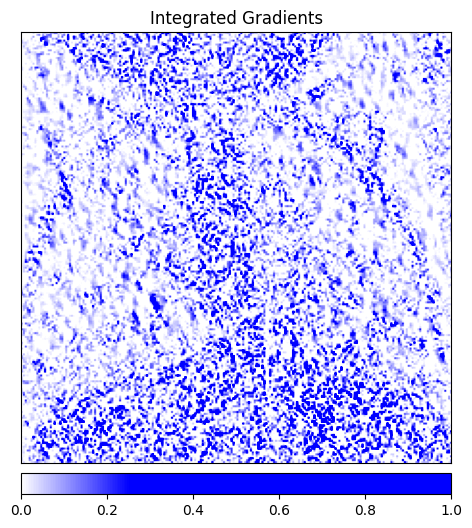

Selected device: cpu


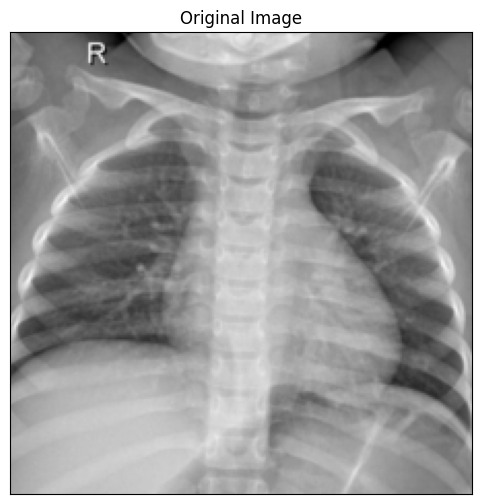

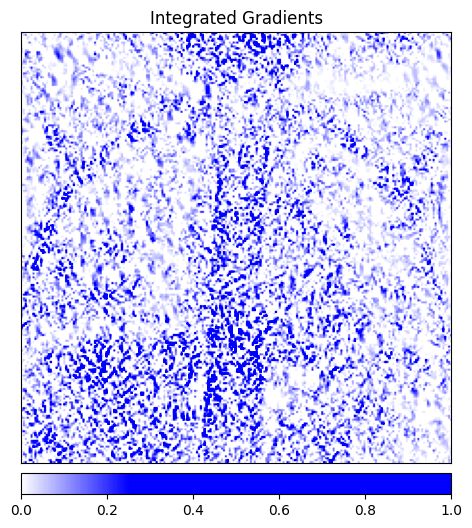

Selected device: cpu


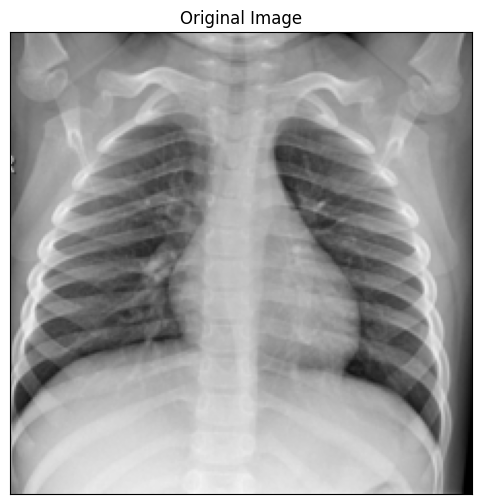

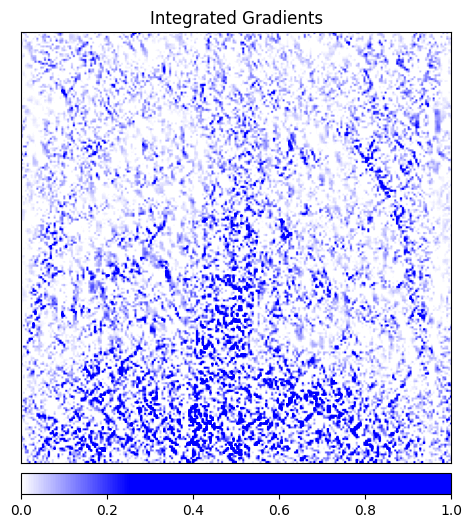

In [ ]:
# Example usage
misclassified_images = incorrect_pred_images[0:5]
correctly_classified_images = correct_pred_images[0:5]

model = torch.load('best_model.pth')
model = model.to(device)

for image_path in misclassified_images:
    EX(model, image_path)
    
for image_path in correctly_classified_images:
    EX(model, image_path)

## Defining the desirable function 2

this function provides a useful way to perform occlusion sensitivity analysis on an input image using the occlusion algorithm and visualize the results. The occlusion sensitivity maps can help identify which regions of the input image were most important in the model's prediction and provide insights into the model's behavior.

In [ ]:
from captum.attr import Occlusion
import numpy as np
from captum.attr import visualization as viz

def EX_2(model, image_path): 
    
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(f"Selected device: {device}")
    model = model.to(device)
    model = model.eval()

    img = Image.open(image_path).convert("RGB")

    center_crop = transforms.Compose([
     transforms.Resize(256),
     transforms.CenterCrop(224),
    ])

    normalize = transforms.Compose([
        transforms.ToTensor(),               # converts the image to a tensor with values between 0 and 1
        transforms.Normalize(                # normalize to follow 0-centered imagenet pixel rgb distribution
         mean=[0.485, 0.456, 0.406],
         std=[0.229, 0.224, 0.225]
        )
    ])
    input_img = normalize(center_crop(img)).unsqueeze(0)
    
    

    occlusion = Occlusion(model)

    strides = (3, 9, 9)               
    target=0,                       
    sliding_window_shapes=(3,45, 45)  
    baselines = 0                     

    attribution_NORMAL = occlusion.attribute(input_img,
                                           strides = strides,
                                           target=target,
                                           sliding_window_shapes=sliding_window_shapes,
                                           baselines=baselines)


    target=1,                       
    attribution_Pneumonia = occlusion.attribute(input_img,
                                           strides = strides,
                                           target=target,
                                           sliding_window_shapes=sliding_window_shapes,
                                           baselines=0)
    
    
    # Convert the compute attribution tensor into an image-like numpy array
    attribution_NORMAL = np.transpose(attribution_NORMAL.squeeze().cpu().detach().numpy(), (1,2,0))

    vis_types = ["heat_map", "original_image"]
    vis_signs = ["all", "all"] # "positive", "negative", or "all" to show both
    # positive attribution indicates that the presence of the area increases the prediction score
    # negative attribution indicates distractor areas whose absence increases the score

    _ = viz.visualize_image_attr_multiple(attribution_NORMAL,
                                          np.array(center_crop(img)),
                                          vis_types,
                                          vis_signs,
                                          ["attribution for Normal", "image"],
                                          show_colorbar = True
                                         )


    attribution_Pneumonia = np.transpose(attribution_Pneumonia.squeeze().cpu().detach().numpy(), (1,2,0))

    _ = viz.visualize_image_attr_multiple(attribution_Pneumonia,
                                          np.array(center_crop(img)),
                                          ["heat_map", "original_image"],
                                          ["all", "all"], # positive/negative attribution or all
                                          ["attribution for Pneumonia", "image"],
                                          show_colorbar = True
                                         )

The result of running below code will be a series of occlusion sensitivity analysis visualizations for each of the input images. These visualizations can provide insights into the model's behavior and help identify which regions of the input image were most important in the model's prediction.

Selected device: cpu


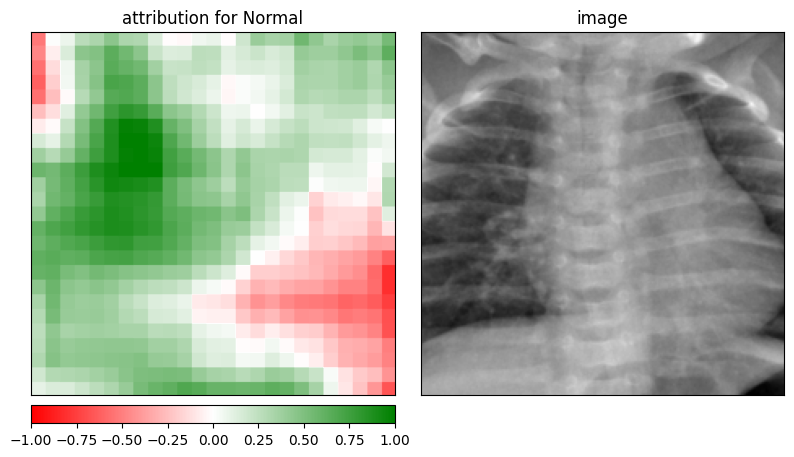

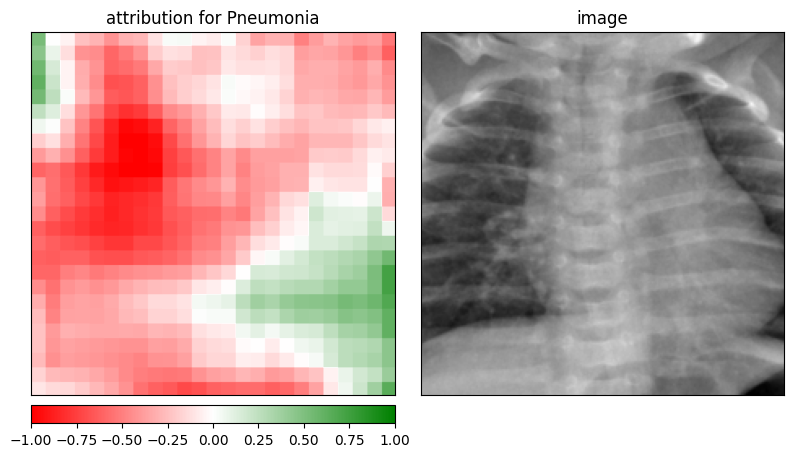

Selected device: cpu


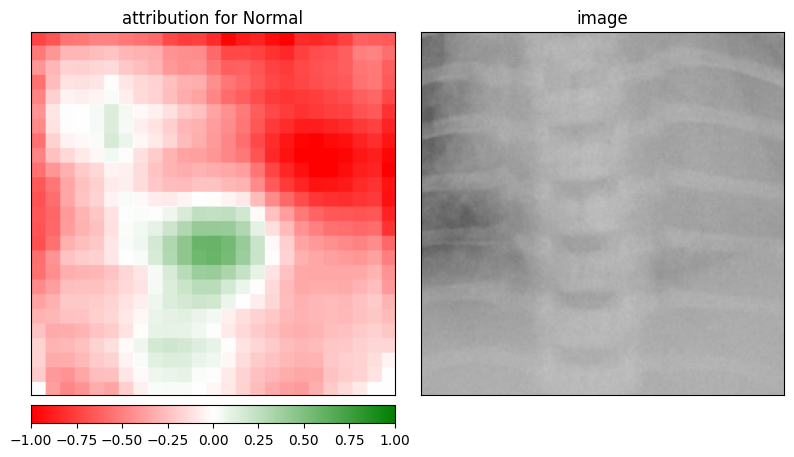

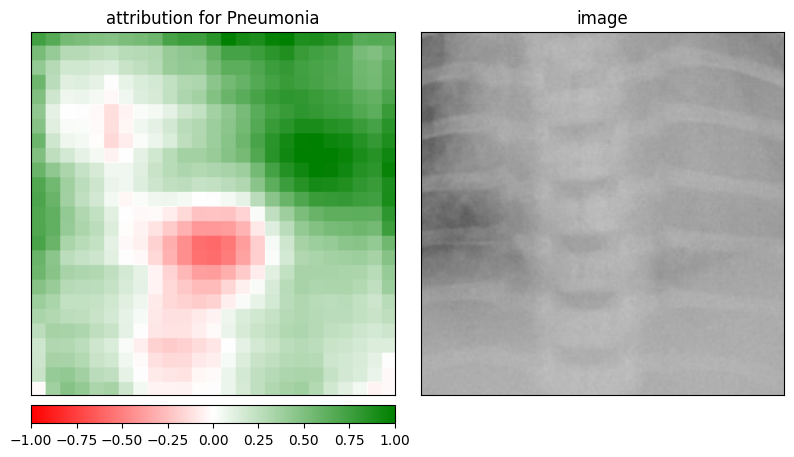

Selected device: cpu


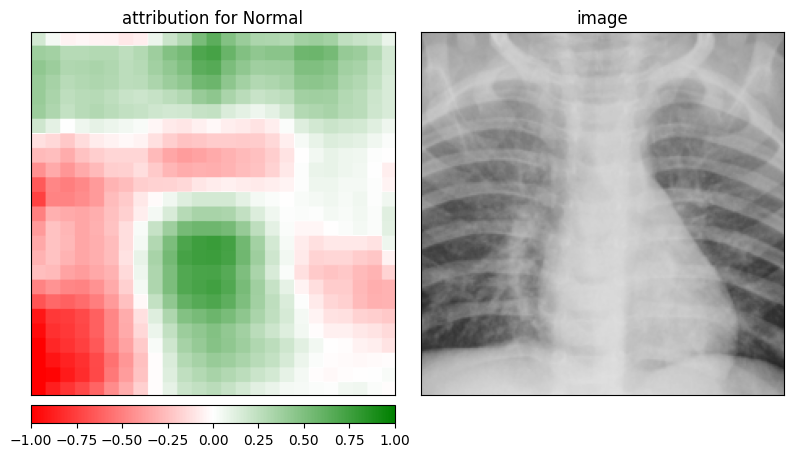

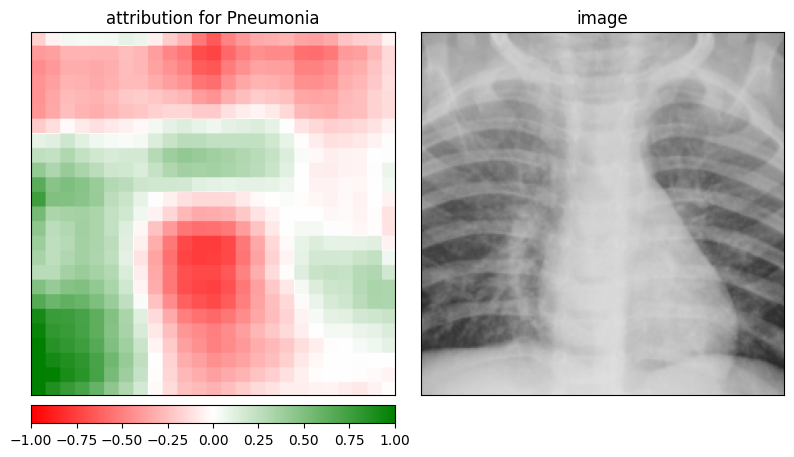

Selected device: cpu


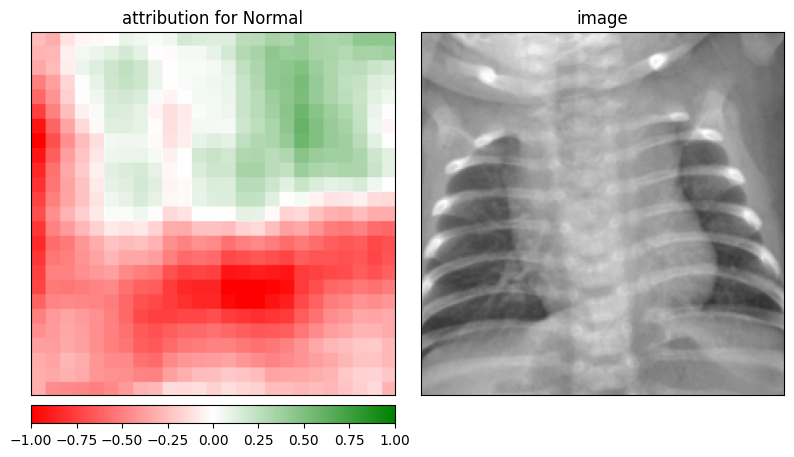

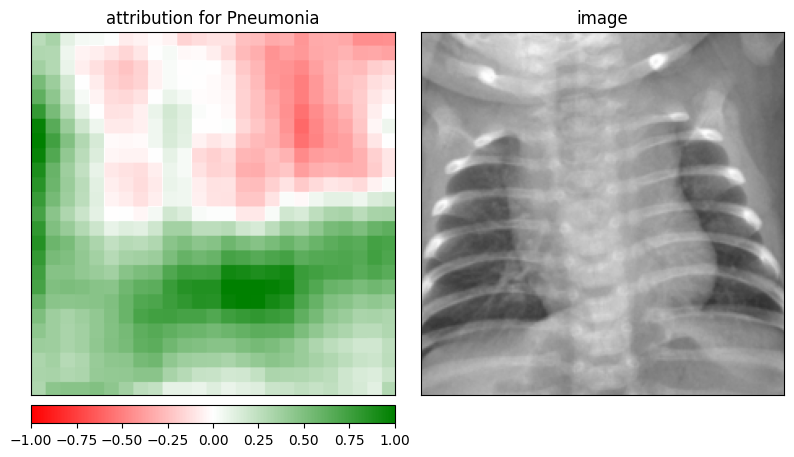

Selected device: cpu


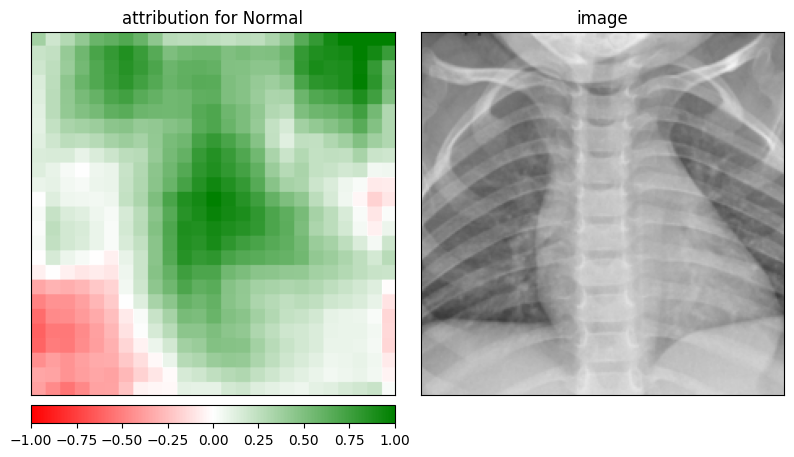

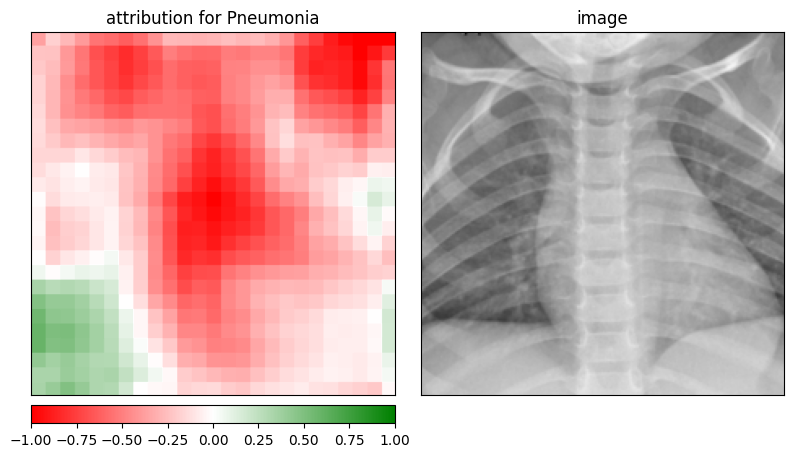

Selected device: cpu


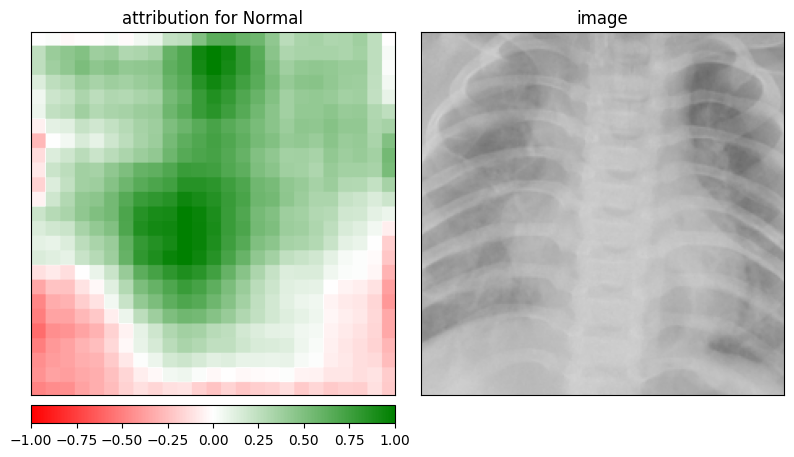

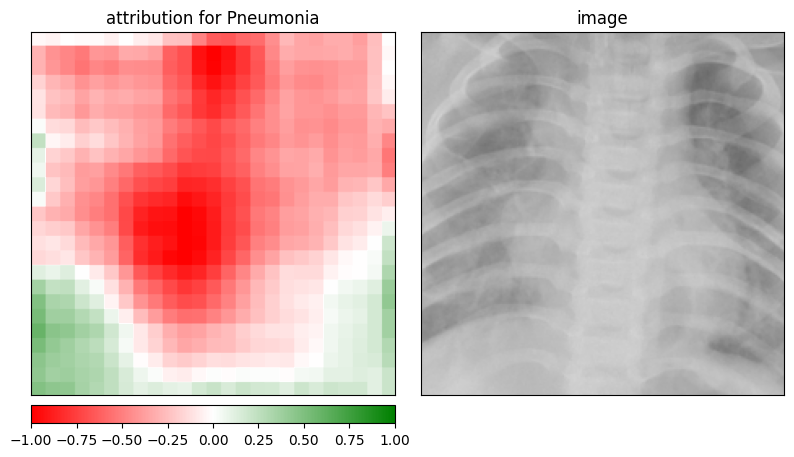

Selected device: cpu


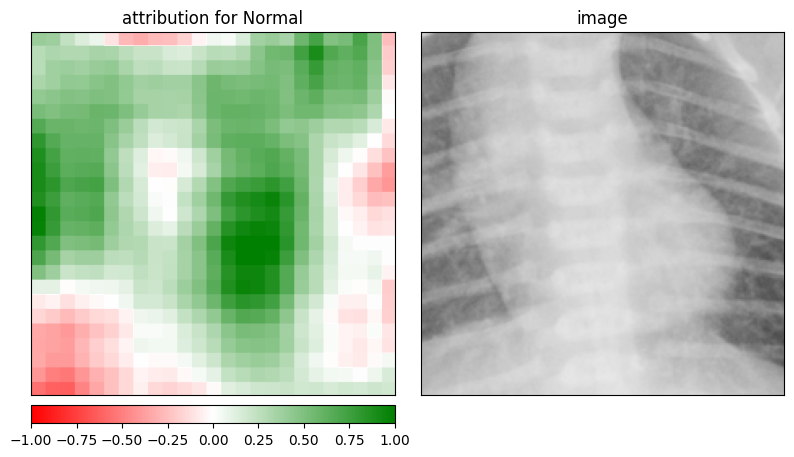

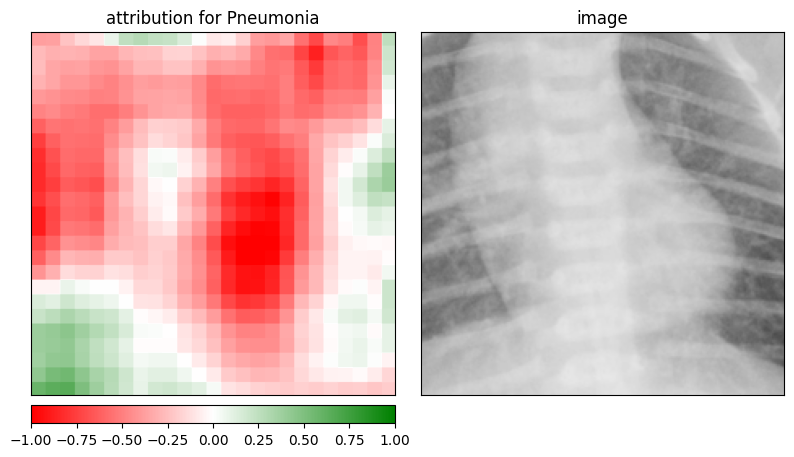

Selected device: cpu


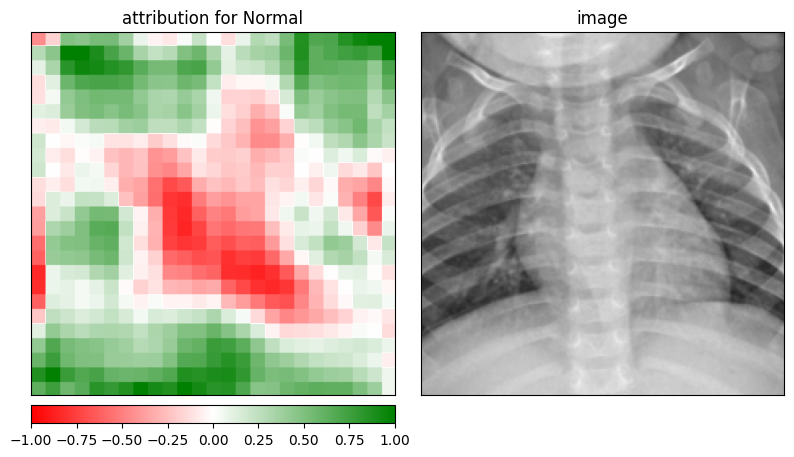

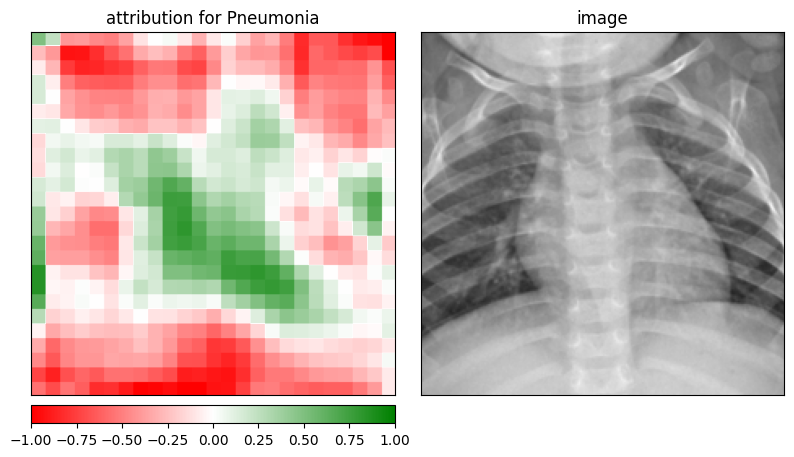

Selected device: cpu


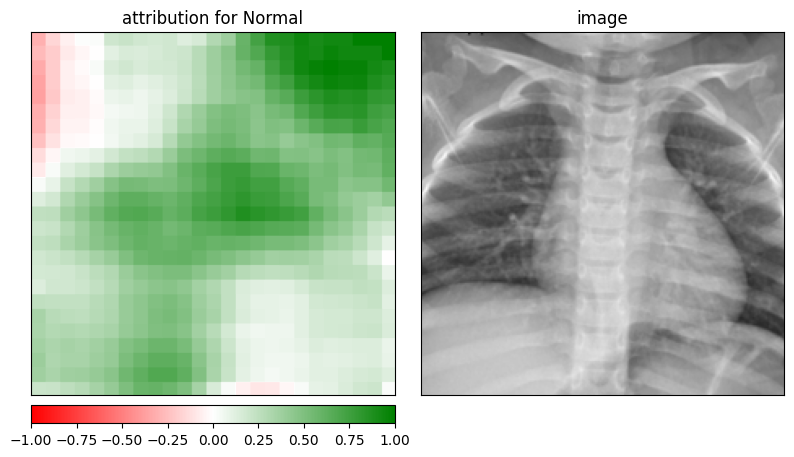

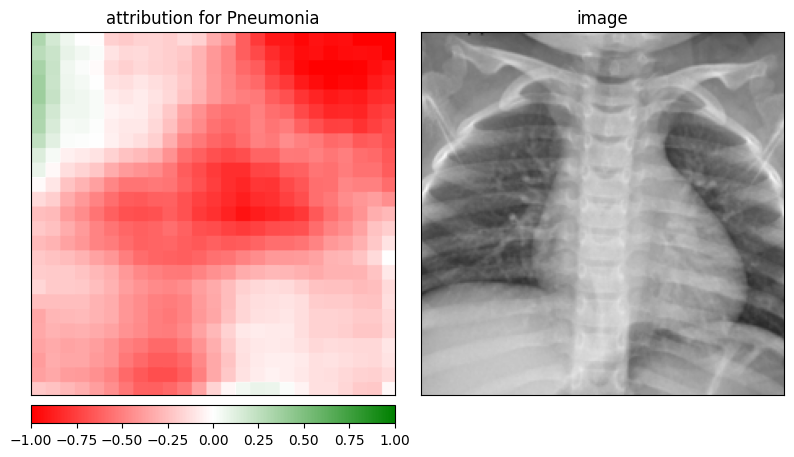

Selected device: cpu


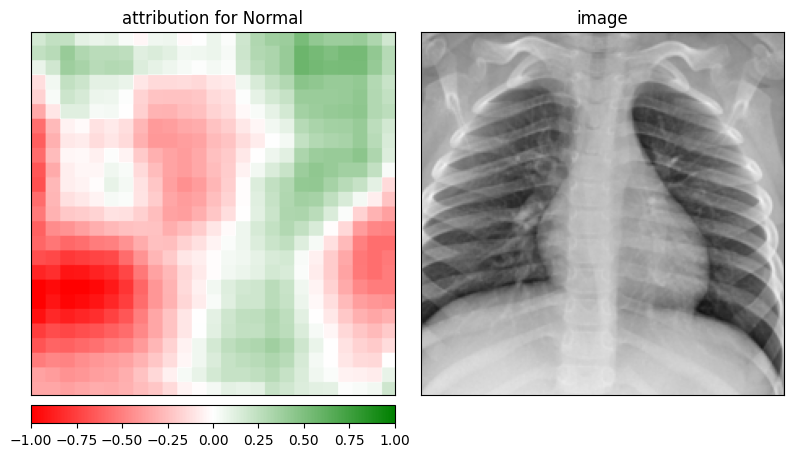

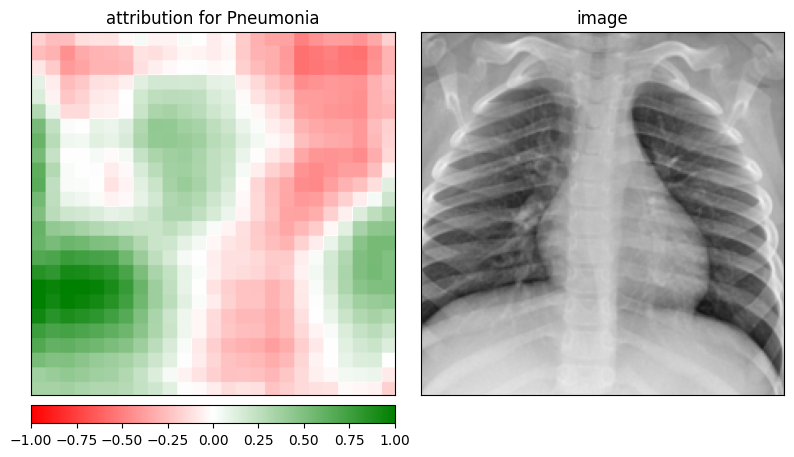

In [ ]:
# Example usage
misclassified_images = incorrect_pred_images[0:5]
correctly_classified_images = correct_pred_images[0:5]

model = torch.load('best_model.pth')
model = model.to(device)

for image_path in misclassified_images:
    EX_2(model, image_path)
    
for image_path in correctly_classified_images:
    EX_2(model, image_path)